In [115]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime, time
#import imageio


from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler, FunctionTransformer

from sklearn.model_selection import cross_val_score, train_test_split 

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

from sklearn.pipeline import Pipeline

Import the data as a dataframe:

In [116]:
df = pd.read_csv('train.csv', index_col = 0, parse_dates=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [118]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- season ---
4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64
---- holiday ---
0    10575
1      311
Name: holiday, dtype: int64
---- workingday ---
1    7412
0    3474
Name: workingday, dtype: int64
---- weather ---
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64
---- temp ---
14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64
---- atemp ---
31.

In [62]:
#df['weekday*workingday'] = -df['weekday']*(df['workingday']-1) #creates an interaction term for (non-)working days and days of the week

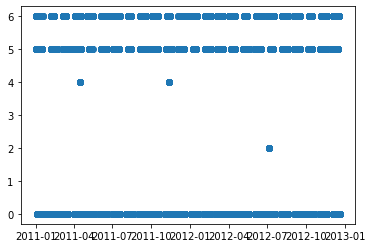

In [61]:
#plt.scatter(df.index,df['weekday*workingday'])

There were ten public holidays on a monday, one on a wednesday, two on a friday

In [120]:
df['weekday']=df.index.weekday

In [121]:
interaction_transformer_day = PolynomialFeatures(interaction_only = True, include_bias = False)
interaction_features_day = interaction_transformer.fit_transform(df[['weekday', 'workingday']].apply(lambda x: (x-1))) 
interaction_features_day = pd.DataFrame(interaction_features,  columns = interaction_transformer.get_feature_names())
